In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("Mall_Customers.csv")

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.drop(['CustomerID'],axis=1,inplace=True) # We dont need Customer ID

In [6]:
df.columns=['Gender','Age','Annual_Income','Spending_Score'] #change the names of the columns

In [7]:
# Convert gender to 1 and 0
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


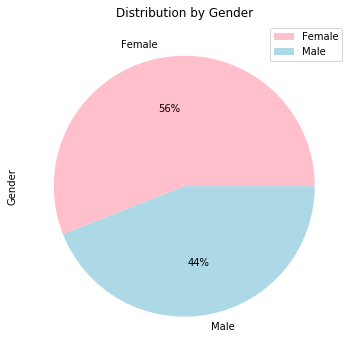

In [8]:
list_gen=df['Gender'].value_counts()
list_gen.plot.pie(figsize=(6, 6), legend=True,autopct='%1.0f%%',labels=['Female','Male'],colors=['pink','lightblue'])
plt.title('Distribution by Gender')
plt.show()

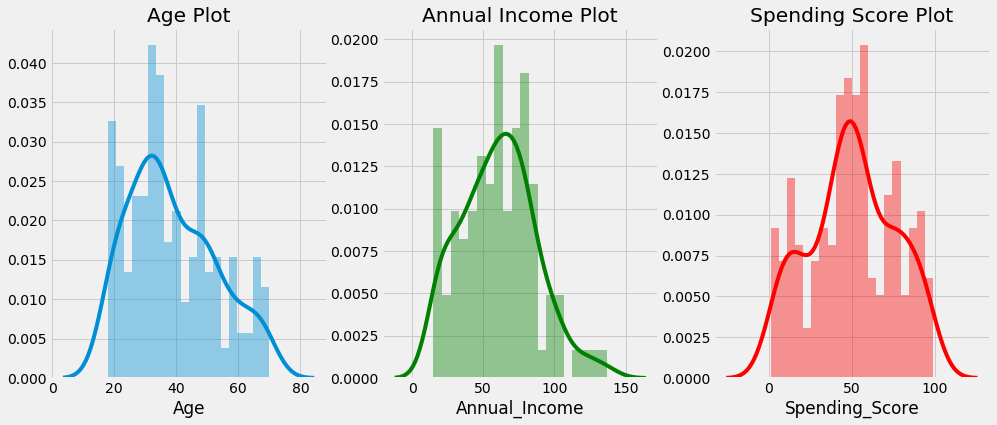

In [9]:
plt.style.use('fivethirtyeight')
AgePlot = df['Age'].value_counts()
IncomePlot = df['Annual_Income'].value_counts().sort_values()
ScorePlot = df['Spending_Score'].value_counts().sort_values()
fig, axs = plt.subplots(1,3,figsize=(15, 6))
sns.distplot(df['Age'] , bins = 20, ax=axs[0])
axs[0].title.set_text('Age Plot')
sns.distplot(df['Annual_Income'] , bins = 20,color='g',ax=axs[1])
axs[1].title.set_text('Annual Income Plot')
sns.distplot(df['Spending_Score'] , bins = 20,color='r',ax=axs[2])
axs[2].title.set_text('Spending Score Plot')

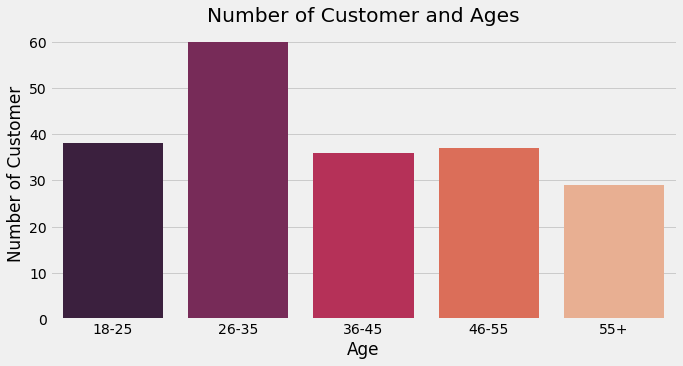

In [10]:
age18_25 = df[(df['Age'] <= 25) & (df['Age']>= 18)]['Age'].count()
age26_35 = df[(df['Age'] <= 35) & (df['Age']>= 26)]['Age'].count()
age36_45 = df[(df['Age'] <= 45) & (df['Age']>= 36)]['Age'].count()
age46_55 = df[(df['Age'] <= 55) & (df['Age']>= 46)]['Age'].count()
age55above =df[df['Age']>= 56]['Age'].count()
x = '18-25 26-35 36-45 46-55 55+'.split()
y = (age18_25, age26_35, age36_45 ,age46_55 ,age55above)
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

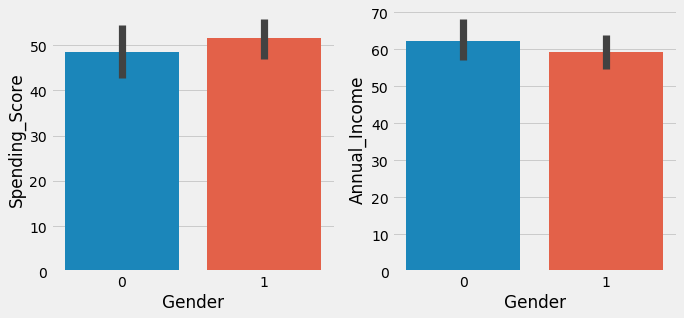

In [11]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(y='Spending_Score',x='Gender', data=df);
ax2 = fig.add_subplot(2,2,2)
sns.barplot(y='Annual_Income',x='Gender', data=df)
plt.show()

We can conclude from the graph above that female's annual income is lower, but their spending score is higher

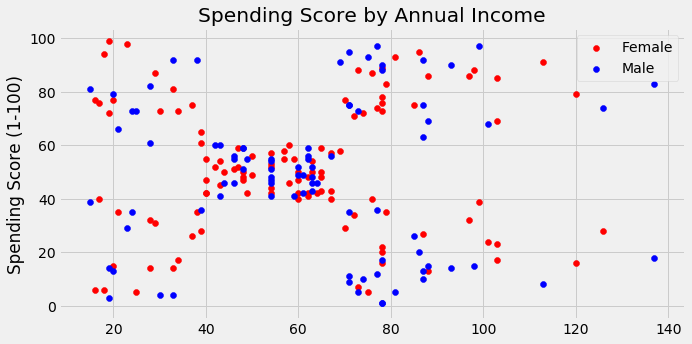

In [12]:
df0=df[df['Gender']==0]
df1=df[df['Gender']==1]
fig = plt.figure(figsize=(10,5))
plt.scatter(df1['Annual_Income'], df1['Spending_Score'],color='red',label='Female')
plt.scatter(df0['Annual_Income'], df0['Spending_Score'],color='blue',label='Male')

plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by Annual Income')
plt.legend()
plt.show()

We can see that people who earns around 50k, has a similar spending score,
and that the gender doesn't seem to have a huge impact.




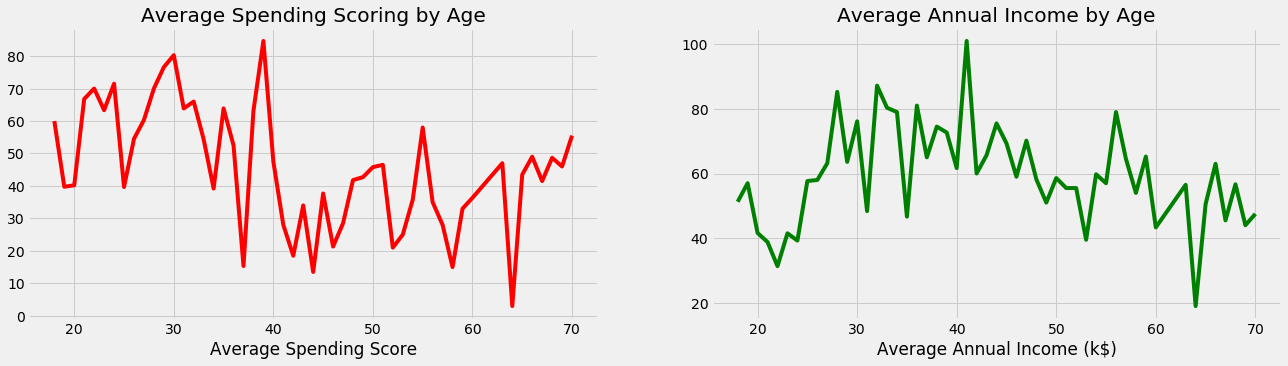

In [13]:
age_count_scr=pd.DataFrame(df.groupby('Age')['Spending_Score'].mean())
fig,axes=plt.subplots(1,2,figsize=(20,5))
axes[0].plot(age_count_scr.index,age_count_scr['Spending_Score'],color='red')
axes[0].set_xlabel("Average Spending Score")
axes[0].set_title('Average Spending Scoring by Age')
age_count_sal=pd.DataFrame(df.groupby('Age')['Annual_Income'].mean())
axes[1].plot(age_count_sal.index,age_count_sal['Annual_Income'],color='green')
axes[1].set_xlabel("Average Annual Income (k$)")
axes[1].set_title('Average Annual Income by Age')
plt.show()

We can coclude from the graph above that in around age 40 people spend the more but also earn the most.

Around ages 20-25 people tend to earn less but spend more.

Around 60-70 people don't earn so much but also don't spend so much.

# Creating Lable

In [16]:
MeanSS=df['Spending_Score'].mean()
df['Target'] = np.where(df['Spending_Score']>MeanSS, 1, 0)
df.head()


,Gender,Age,Annual_Income,Spending_Score,Target
0,0,19,15,39,0
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,0


Adding labels to data where the Spending score is greater/Less than Spending Score mean value

1: Target- people who spend above the average (Our target costumers)

0: Non-Target - people who do not spend so much

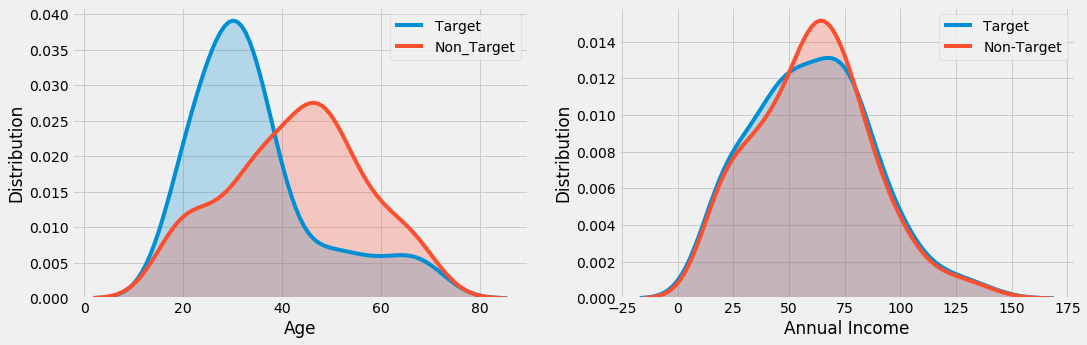

In [17]:
chart=df.drop(["Spending_Score"],axis=1)

fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(16,5))

sns.kdeplot(chart.Age[chart.Target==1], label='Target', shade=True, ax=ax1)
sns.kdeplot(chart.Age[chart.Target==0], label='Non_Target', shade=True, ax=ax1)
ax1.set_ylabel('Distribution')
ax1.set_xlabel('Age')

sns.kdeplot(chart.Annual_Income[chart.Target==1], label='Target', shade=True, ax=ax2)
sns.kdeplot(chart.Annual_Income[chart.Target==0], label='Non-Target', shade=True, ax=ax2)
ax2.set_ylabel('Distribution')
ax2.set_xlabel('Annual Income')
plt.show()

Age seems like a really good predictor and annual income has a slight inverse effect on target/non-target.


**The goal is to classify the mall's customers to Targets & Non-Targets costumers according to their features.** (classification problem)